In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve

default = pd.read_csv('/Users/scrysam/Downloads/targetcandidates4.csv')
default.describe()

,BuildNumber,TotalSevereBuildWarnings,CodeCoverage,TotalNumberofcommits,Working
count,99.000000,99.000000,99.000000,99.000000,99.000000
mean,3.402293,7.949495,0.560303,10.131313,0.404040
std,0.134960,2.738142,0.163990,5.670631,0.493203
min,3.151000,1.000000,0.310000,1.000000,0.000000
25%,3.283000,6.000000,0.410000,5.000000,0.000000
50%,3.408000,8.000000,0.540000,10.000000,0.000000
75%,3.508000,10.000000,0.705000,15.000000,1.000000
max,3.621000,14.000000,0.830000,21.000000,1.000000


In [2]:

target_name = 'Working'
X = default.drop('Working', axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y = default[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)
default.head()

,BuildNumber,TotalSevereBuildWarnings,CodeCoverage,TotalNumberofcommits,Working
0,3.564,10,0.41,20,1
1,3.408,11,0.43,20,0
2,3.460,8,0.83,17,1
3,3.588,7,0.62,19,1
4,3.261,6,0.80,18,0


In [3]:
def CMatrix(CM, labels=['code','Working']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [4]:
metrics = pd.DataFrame(index=['accuracy','precision','recall'],
                      columns=['NULL', 'LogisticReg', 'ClassTree', 'NaiveBayes'])

y_pred_test = np.repeat(y_train.value_counts().idxmax(), y_test.size)
metrics.loc['accuracy', 'NULL'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'NULL'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'NULL'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PREDICTION,code,Working,Total
TRUE,,,
code,44,0,44
Working,26,0,26
Total,70,0,70


In [5]:
from sklearn.tree import DecisionTreeClassifier
class_tree = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10)
class_tree.fit(X_train,y_train)

y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy', 'ClassTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'ClassTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'ClassTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PREDICTION,code,Working,Total
TRUE,,,
code,44,0,44
Working,26,0,26
Total,70,0,70


In [6]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(X_train,y_train)

y_pred_test = NBC.predict(X_test)
metrics.loc['accuracy', 'NaiveBayes'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'NaiveBayes'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'NaiveBayes'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,code,Working,Total
TRUE,,,
code,18,26,44
Working,13,13,26
Total,31,39,70


In [7]:
100*metrics

,NULL,LogisticReg,ClassTree,NaiveBayes
accuracy,62.8571,NaN,62.8571,44.2857
precision,0,NaN,0,33.3333
recall,0,NaN,0,50


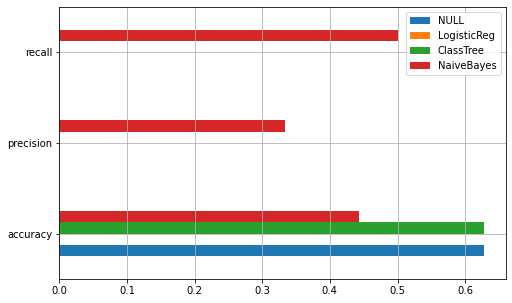

In [8]:
fig, ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='barh', ax=ax)
ax.grid();